In [317]:
#data manipulation
import pandas as pd
import numpy as np
import re
import string
import datetime

#emoji handling
import demoji

#text processing
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
from textblob import TextBlob

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud




In [249]:
stop_words = set(stopwords.words('english'))

In [250]:
spam_words = [
    "$BTC", "#Bitcoin", "#btc", "#cryptocurrency", "#cryptotrading", "#Crypto", "#Cryptos", "#Cryptocrash",
    "#dogecoin", "$DOGE", "#XRP","#ADA", "#SOL", "#BNB","#LUNAUSDT", "#LUNA", "$ETH", "$UST","bitcoin","btc","cryptocurrency","thewealthofapes",
    "avgo","nvda","qcom","msft","dogecoin" ,"doge", "xrp" ,"ada" ,"sol" ,"bnb" ,"lunausdt", "luna", "eth", "ust",
    "cryptotrading", "crypto", "cryptos" ,"cryptocrash","wallstreet", "wallstreetbets","follow"]
set(spam_words)

{'#ADA',
 '#BNB',
 '#Bitcoin',
 '#Crypto',
 '#Cryptocrash',
 '#Cryptos',
 '#LUNA',
 '#LUNAUSDT',
 '#SOL',
 '#XRP',
 '#btc',
 '#cryptocurrency',
 '#cryptotrading',
 '#dogecoin',
 '$BTC',
 '$DOGE',
 '$ETH',
 '$UST',
 'ada',
 'avgo',
 'bitcoin',
 'bnb',
 'btc',
 'crypto',
 'cryptocrash',
 'cryptocurrency',
 'cryptos',
 'cryptotrading',
 'doge',
 'dogecoin',
 'eth',
 'follow',
 'luna',
 'lunausdt',
 'msft',
 'nvda',
 'qcom',
 'sol',
 'thewealthofapes',
 'ust',
 'wallstreet',
 'wallstreetbets',
 'xrp'}

In [251]:
df = pd.read_csv('TSLAtweets.csv')

In [252]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-09-30 23:43:11+00:00,jeas3xy,Waiting for AI Day in All Day ⚡️🔋🦾🍾\n#TSLA #AI...
1,1,2022-09-30 23:41:56+00:00,ErikSteiner8,"Tesla Inc (TSLA) price at close, 2022-09-30, i..."
2,2,2022-09-30 23:11:18+00:00,drame_47,@Helloimmorgan We’ll sell everything buy #TSLA...
3,3,2022-09-30 22:59:34+00:00,BM4LifeAfter,"Totally A @elonmusk Break 🆙 song, LOL buy Bitc..."
4,4,2022-09-30 22:46:06+00:00,allEVehicles,NEW Electric Sedan For Under $27K! \n\nCheck o...


In [253]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)
df.set_index('index',inplace=True)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20000 non-null  object
 1   User    20000 non-null  object
 2   Tweet   20000 non-null  object
dtypes: object(3)
memory usage: 625.0+ KB


In [255]:
df['Date'].max()

'2022-09-30 23:43:11+00:00'

In [256]:
df['Date'].min()

'2022-05-19 04:56:01+00:00'

In [326]:
df['Date']=pd.to_datetime(df['Date'])
df['monthly']= df['Date'].map(lambda x: f'{x.month}{x.year}')

In [257]:
df['wordcount_bc']=df['Tweet'].map(lambda x:len(x.split()))
df.head()

,Date,User,Tweet,wordcount_bc
index,,,,
0,2022-09-30 23:43:11+00:00,jeas3xy,Waiting for AI Day in All Day ⚡️🔋🦾🍾\n#TSLA #AI...,16
1,2022-09-30 23:41:56+00:00,ErikSteiner8,"Tesla Inc (TSLA) price at close, 2022-09-30, i...",12
2,2022-09-30 23:11:18+00:00,drame_47,@Helloimmorgan We’ll sell everything buy #TSLA...,7
3,2022-09-30 22:59:34+00:00,BM4LifeAfter,"Totally A @elonmusk Break 🆙 song, LOL buy Bitc...",21
4,2022-09-30 22:46:06+00:00,allEVehicles,NEW Electric Sedan For Under $27K! \n\nCheck o...,40


## Tweet text temizliği öncesi kelime dağılımı

In [258]:
pd.DataFrame(df['wordcount_bc'].describe()).T

,count,mean,std,min,25%,50%,75%,max
wordcount_bc,20000.0,24.7188,13.501305,2.0,14.0,22.0,35.0,88.0


<AxesSubplot:xlabel='wordcount_bc', ylabel='Count'>

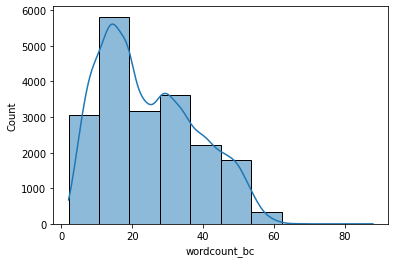

In [259]:
sns.histplot(data=df['wordcount_bc'],bins=10,kde=True)

## Cleaning text

In [290]:
def CleanTXT(text):
    text = text.lower() # text lowered
    
    text = demoji.replace(text,"") # emojis removed
    
    text = re.sub('\n',' ',text) # remove \n
    
    text = re.sub(r'@\w+|\#','',text) # remove hashtags and @ mentions 
    
    text= text.translate(str.maketrans("","",string.punctuation)) #punctuation removed
    
   

    #https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
    text = re.sub(r"http\s+|www\S+|https\S+","",text,flags=re.MULTILINE) # remove link 
    
    #filtering stopwords
    filtered_words = [word for word in TextBlob(text).words if word not in stop_words]
    
    #filtering spamwords
    filtered_words = [word for word in filtered_words if word not in spam_words]
    
    #lemmatization
    lemmatized_words = [word.lemmatize('v') for word in filtered_words]
    
    #stemming
    #stemmed_words = [word.stem() for word in lemmatized_words]
    
    return " ".join(lemmatized_words)

In [291]:
%%time
df['cleanTweet'] = df['Tweet'].map(CleanTXT) 

Wall time: 25.8 s


In [292]:
df['wordcount_ac']=df['cleanTweet'].map(lambda x:len(x.split()))
df.head()

,Date,User,Tweet,wordcount_bc,cleanTweet,wordcount_ac,Subjectivity,Polarity
index,,,,,,,,
0,2022-09-30 23:43:11+00:00,jeas3xy,Waiting for AI Day in All Day ⚡️🔋🦾🍾\n#TSLA #AI...,16,wait ai day day ️ tsla aiday2022 lasvegas gyml...,12,0.000000,0.000000
1,2022-09-30 23:41:56+00:00,ErikSteiner8,"Tesla Inc (TSLA) price at close, 2022-09-30, i...",12,tesla inc tsla price close 20220930 26525 tesl...,9,0.000000,0.000000
2,2022-09-30 23:11:18+00:00,drame_47,@Helloimmorgan We’ll sell everything buy #TSLA...,7,’ sell everything buy tsla,5,0.000000,0.000000
3,2022-09-30 22:59:34+00:00,BM4LifeAfter,"Totally A @elonmusk Break 🆙 song, LOL buy Bitc...",21,totally break song lol buy bitch ’ go mar tsla...,12,0.516667,0.366667
4,2022-09-30 22:46:06+00:00,allEVehicles,NEW Electric Sedan For Under $27K! \n\nCheck o...,40,new electric sedan 27k check shenlan sl03 rece...,29,0.301136,0.127841


In [293]:
df.describe()

,wordcount_bc,wordcount_ac,Subjectivity,Polarity
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,24.718800,15.640250,0.310701,0.087057
std,13.501305,8.797193,0.304430,0.247146
min,2.000000,1.000000,0.000000,-1.000000
25%,14.000000,9.000000,0.000000,0.000000
50%,22.000000,14.000000,0.300000,0.000000
75%,35.000000,23.000000,0.535714,0.175000
max,88.000000,55.000000,1.000000,1.000000


<AxesSubplot:xlabel='wordcount_ac', ylabel='Count'>

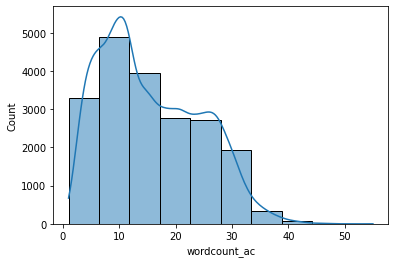

In [294]:
sns.histplot(data=df['wordcount_ac'],bins=10,kde=True)

In [331]:
df.groupby('monthly').agg({ 'wordcount_bc':lambda x:x.mean(),
                            'wordcount_ac':lambda x:x.mean()})

,wordcount_bc,wordcount_ac
monthly,,
52022,23.490711,14.419574
62022,24.776296,15.937404
72022,24.306291,15.293582
82022,24.932398,15.995909
92022,25.544667,15.973521


In [295]:
print(df.loc[19748]['cleanTweet'])

elon implode elonmusk elongate twitter tesla teslastock tsla tsla spacex twitterstock twtr twtr


In [296]:
print(df.loc[161]['cleanTweet'])

spy qqq tsla aapl spy need another pump amp dump aapl inside downtrend channel touch lower trendline 4hr consolidation current level sr bloody september last day tomorrow fiscal amp quarter end tomorrow options trade daytrading tsla


In [297]:
print(df.loc[19887]['cleanTweet'])

5y plan isnt stonk buyback casino neither mstr tsla issue margin call even drop 3500 read last earn report also cycle ever go lower previous ath 20k zach kirkhorn neeeds wtfu


In [298]:
print(df.loc[47]['cleanTweet'])

amzn googl aapl tsla nflx es qqq iwm qqq spy es try hold jun low 3639 time see profit take table raise cash tsla one compare mega cap techs performance recent months


In [299]:
for i in list(df.sample(10, random_state=1).index):
    print(df.loc[i]['cleanTweet'])

portfolio diversification right thing thats hold tesla stock split across three different broker two different exchange tsla tsla
tsla 3rd mention last 24 hours via tsla stock
please keep pressure countdown tsla get ig long overdue thank alexandra
gme amc tsla meme holders ready
gme gme 23 last 6 months… whilst amzn aapl nflx meta red tsla 066 green probablynothing
market open today something definitely gon na happen tsla
tsla sideways tsla chart
10 years ’ matter market today long tsla forever
stockmarket ignore bad news…until one day ’ lot money lose unprepared investors stock bearmarket trade aapl amd tsla nflx meta tradingtips amc gme stockmarketcrash recession
check tsla analysis ab cd bull consensus regression channel sto nqqe hull mas options flow fundamentals


In [300]:
quants = (0,0.25,0.5,0.75,0.9,0.95,0.99,0.9999,1)
df.quantile(quants)

,wordcount_bc,wordcount_ac,Subjectivity,Polarity
0.0000,2.0000,1.0000,0.000000,-1.000000
0.2500,14.0000,9.0000,0.000000,0.000000
0.5000,22.0000,14.0000,0.300000,0.000000
0.7500,35.0000,23.0000,0.535714,0.175000
0.9000,45.0000,28.0000,0.750000,0.416667
0.9500,49.0000,31.0000,0.900000,0.575000
0.9900,55.0000,36.0000,1.000000,0.800000
0.9999,67.0008,48.0003,1.000000,1.000000
1.0000,88.0000,55.0000,1.000000,1.000000


In [301]:
df[df['wordcount_ac']>50]

,Date,User,Tweet,wordcount_bc,cleanTweet,wordcount_ac,Subjectivity,Polarity
index,,,,,,,,
3028,2022-09-09 13:41:22+00:00,tafund,https://t.co/WaC9TjqQBy\nOur bet: SPX 3600 Bef...,55,bet spx 3600 4400 pvt sp 4040 s1 4k r1 4050 se...,51,0.0,0.0
15649,2022-06-16 11:51:07+00:00,tafund,Buy every dip vs. fundamentals matter\nYou kno...,61,buy every dip vs fundamentals matter know stra...,55,0.3,0.0


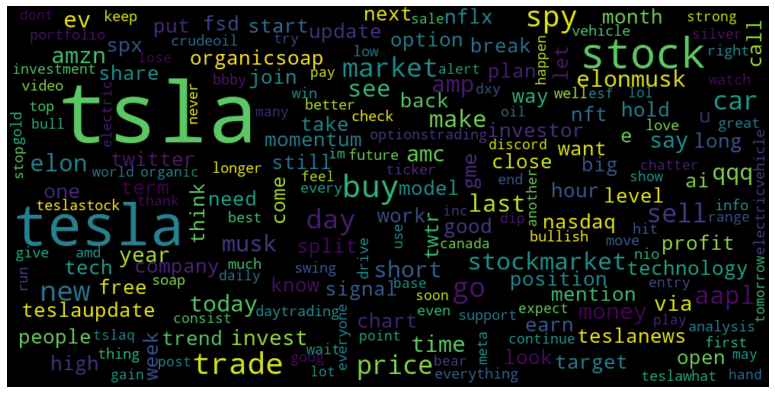

In [302]:
# ploting word cloud

allWords = ' '.join([twts for twts in df['cleanTweet']])
wordCloud = WordCloud(width= 1000,height=500,random_state=35,max_font_size=110,collocations=False).generate(allWords)

figure = plt.figure(figsize=(15,7))
plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [303]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [304]:
df['Subjectivity']= df['cleanTweet'].map(getSubjectivity)
df['Polarity']=df['cleanTweet'].map(getPolarity)

In [305]:
df.head()

,Date,User,Tweet,wordcount_bc,cleanTweet,wordcount_ac,Subjectivity,Polarity
index,,,,,,,,
0,2022-09-30 23:43:11+00:00,jeas3xy,Waiting for AI Day in All Day ⚡️🔋🦾🍾\n#TSLA #AI...,16,wait ai day day ️ tsla aiday2022 lasvegas gyml...,12,0.000000,0.000000
1,2022-09-30 23:41:56+00:00,ErikSteiner8,"Tesla Inc (TSLA) price at close, 2022-09-30, i...",12,tesla inc tsla price close 20220930 26525 tesl...,9,0.000000,0.000000
2,2022-09-30 23:11:18+00:00,drame_47,@Helloimmorgan We’ll sell everything buy #TSLA...,7,’ sell everything buy tsla,5,0.000000,0.000000
3,2022-09-30 22:59:34+00:00,BM4LifeAfter,"Totally A @elonmusk Break 🆙 song, LOL buy Bitc...",21,totally break song lol buy bitch ’ go mar tsla...,12,0.516667,0.366667
4,2022-09-30 22:46:06+00:00,allEVehicles,NEW Electric Sedan For Under $27K! \n\nCheck o...,40,new electric sedan 27k check shenlan sl03 rece...,29,0.301136,0.127841


In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          20000 non-null  datetime64[ns, UTC]
 1   User          20000 non-null  object             
 2   Tweet         20000 non-null  object             
 3   wordcount_bc  20000 non-null  int64              
 4   cleanTweet    20000 non-null  object             
 5   wordcount_ac  20000 non-null  int64              
 6   Subjectivity  20000 non-null  float64            
 7   Polarity      20000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 1.9+ MB


index
0        92022
1        92022
2        92022
3        92022
4        92022
         ...  
19995    52022
19996    52022
19997    52022
19998    52022
19999    52022
Name: monthly, Length: 20000, dtype: object